In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [ ]:
train_data.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mr. Victor de Satode",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_data = train_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
test_data = test_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
train_data.head() # check everything looks okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

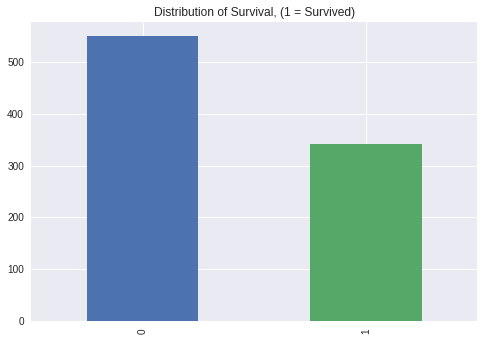

In [ ]:
train_data.Survived.value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

In [ ]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Sex', bins=2)

Text(0.5, 1.0, 'Class Distribution')

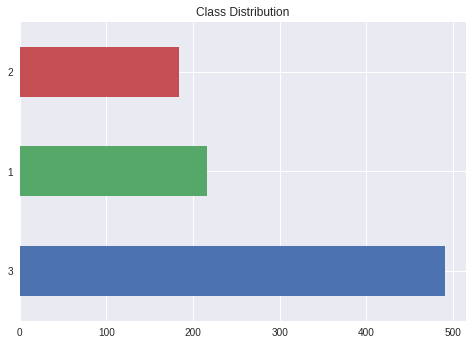

In [ ]:
train_data.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

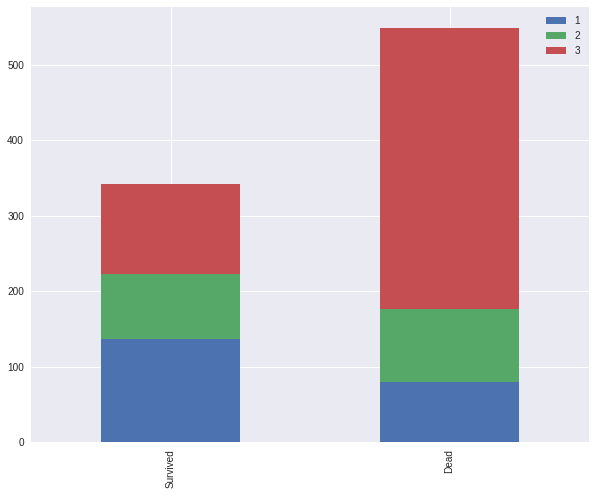

In [ ]:
pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

Text(0.5, 1.0, 'Passengers per boarding location')

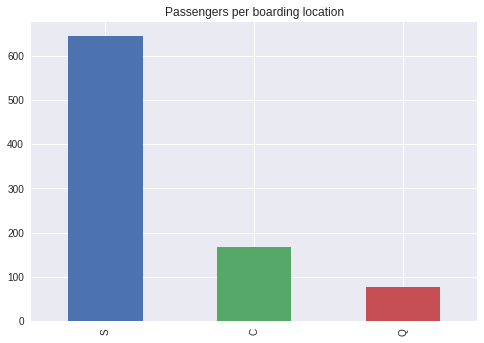

In [ ]:
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Survival and Death in Different ports')

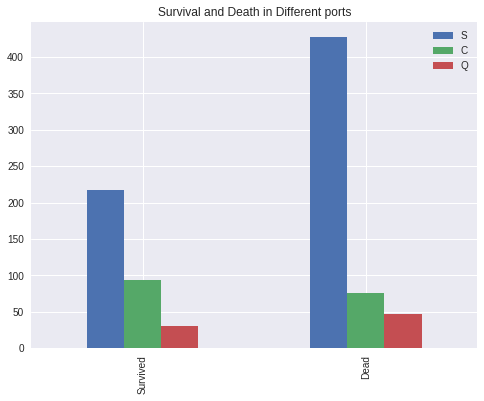

In [ ]:
survived = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title("Survival and Death in Different ports")

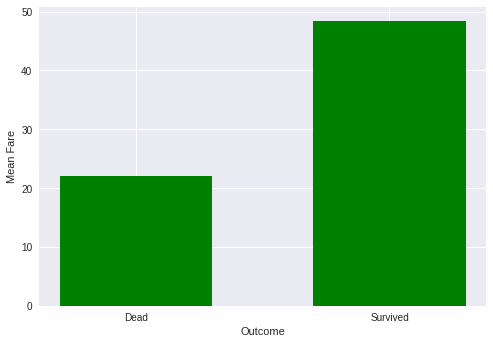

In [ ]:
survived_0 = train_data[train_data['Survived'] == 0]["Fare"].mean()
survived_1 = train_data[train_data['Survived'] == 1]["Fare"].mean()
xs  = [survived_0, survived_1]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center',color = 'green')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

In [ ]:
def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # embarked {S, C, Q} => 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset.drop('Embarked', axis=1)
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [ ]:
corr = train_data.corr()
print(corr)

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex         0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age        -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

In [ ]:
sns.heatmap(np.abs(corr),
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
FamilySize    891 non-null int64
dtypes: float64(1), int64(7), uint8(3)
memory usage: 58.4 KB
None


In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
FamilySize    418 non-null int64
dtypes: float64(1), int64(6), uint8(3)
memory usage: 24.2 KB
None


In [ ]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train = train_data.drop("Survived", axis=1)[:800]
Y_train = train_data["Survived"][:800]
X_crossValidation = train_data.drop("Survived", axis=1)[800:]
Y_crossValidation = train_data["Survived"][800:]
X_test = test_data

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predL = model_logistic.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

80.0
82.42


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

89.62
79.12


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
train_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(knn.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predK = knn.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

82.5
75.82


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(random_forest.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predR = random_forest.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

98.0
85.71
